In [1]:
import rasterio
from rasterio.plot import show
import geopandas as gpd
import pandas as pd
import os

In [2]:
import numpy as np

<Axes: >

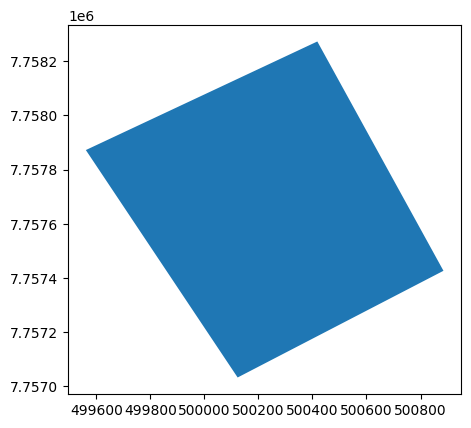

In [3]:
# make shape
from shapely.geometry import Polygon
# VALLE
lat_point_list = [7758274, 7757425, 7757030, 7757872]
lon_point_list = [500418, 500885, 500123, 499561]

polygon_geom = Polygon(zip(lon_point_list, lat_point_list))
polygon = gpd.GeoDataFrame(index=[0], crs='epsg:3067', geometry=[polygon_geom])       
polygon.plot()

In [4]:
# save file
outdir = './data/output'
filename = 'valle_outline_big.shp'
outfilepath = os.path.join(outdir, filename)
polygon.to_file(outfilepath, driver="ESRI Shapefile")

In [5]:
raster = rasterio.open("./data/valle/valle_outline_masked_qgis.tif")

In [6]:
raster.shape

(288, 268)

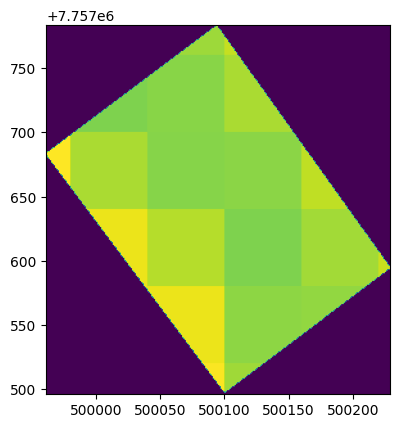

<Axes: >

In [7]:
show(raster)

In [8]:
data = raster.read()

In [9]:
## data[band][row in raster][pixel in row]
data[3][90]#[100]

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.     ,
       0.     , 0.     , 0.     , 0.     , 0.     , 0.     , 0.1527 ,
       0.1527 , 0.1527 , 0.1527 , 0.1527 , 0.1527 , 0.12625, 0.12625,
       0.12625, 0.12625, 0.12625, 0.12625, 0.12625, 0.12625, 0.12625,
       0.12625, 0.12005, 0.12005, 0.12005, 0.12005, 0.12005, 0.12005,
       0.12005, 0.12005, 0.12005, 0.12005, 0.1169 , 0.1169 , 0.1169 ,
       0.1169 , 0.1169 , 0.1169 , 0.1169 , 0.1169 , 0.1169 , 0.1169 ,
       0.11435, 0.11435, 0.11435, 0.11435, 0.11435, 0.11435, 0.11435,
       0.11435, 0.11435, 0.11435, 0.1126 , 0.1126 , 0.1126 , 0.1126 ,
       0.1126 , 0.1126 , 0.1126 , 0.1126 , 0.1126 , 0.1126 , 0.11295,
       0.11295, 0.11295, 0.11295, 0.11295, 0.11295, 0.11295, 0.11295,
       0.11295, 0.11295, 0.1121 , 0.1121 , 0.1121 , 0.1121 , 0.1121 ,
       0.1121 , 0.1121 , 0.1121 , 0.1121 , 0.1121 , 0.1123 , 0.1123 ,
       0.1123 , 0.1123 , 0.1123 , 0.1123 , 0.1123 , 0.1123 , 0.1123 ,
       0.1123 , 0.11

In [10]:
data.min()

0.0

In [11]:
data.max()

0.464

In [12]:
raster.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 268,
 'height': 288,
 'count': 23,
 'crs': CRS.from_epsg(3067),
 'transform': Affine(1.0, 0.0, 499961.0,
        0.0, -1.0, 7757784.0)}

In [13]:
# Read all bands
array = raster.read()

# Calculate statistics for each band
stats = []
for band in array:
    stats.append({
        'min': band.min(),
        'mean': band.mean(),
        'median': np.median(band),
        'max': band.max()})

# Show stats for each channel
stats

[{'min': 0.0, 'mean': 0.06308466, 'median': 0.0, 'max': 0.148},
 {'min': 0.0, 'mean': 0.06479798, 'median': 0.0, 'max': 0.1999},
 {'min': 0.0, 'mean': 0.0667297, 'median': 0.0, 'max': 0.2223},
 {'min': 0.0, 'mean': 0.06391292, 'median': 0.0, 'max': 0.2412},
 {'min': 0.0, 'mean': 0.0695964, 'median': 0.0, 'max': 0.2414},
 {'min': 0.0, 'mean': 0.08275321, 'median': 0.0, 'max': 0.39135},
 {'min': 0.0, 'mean': 0.08778401, 'median': 0.0, 'max': 0.43475},
 {'min': 0.0, 'mean': 0.08676969, 'median': 0.0, 'max': 0.457},
 {'min': 0.0, 'mean': 0.088702895, 'median': 0.0, 'max': 0.464},
 {'min': 0.0, 'mean': 0.10006104, 'median': 0.0, 'max': 0.4004},
 {'min': 0.0, 'mean': 0.07958333, 'median': 0.0, 'max': 0.33745},
 {'min': 0.0, 'mean': 0.06970707, 'median': 0.0, 'max': 0.2958},
 {'min': 0.0, 'mean': 0.004138235, 'median': 0.0, 'max': 0.0084},
 {'min': 0.0, 'mean': 0.10833646, 'median': 0.0, 'max': 0.37405},
 {'min': 0.0, 'mean': 0.00026128342, 'median': 0.0, 'max': 0.0006},
 {'min': 0.0, 'mean':

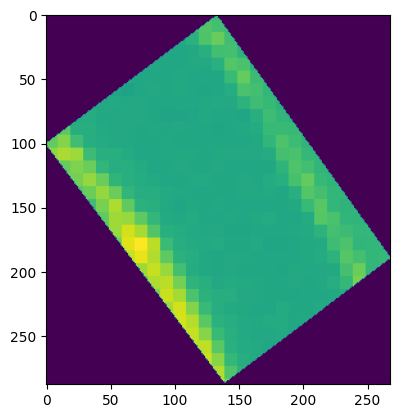

<Axes: >

In [14]:
show(raster.read(2))

In [15]:
raster.shape

(288, 268)

In [16]:
from test_script import attenuation_coef_ratio

In [17]:
type(data)

numpy.ndarray

In [24]:
coef_ratio = attenuation_coef_ratio(band_i=data[1], # coastal band
                                    band_j=data[3], # green
                                    apply_log=False)

In [25]:
print(coef_ratio)

0.9908802755591943
